# <span style="color:blue">**Network Building and Text Analysis**</span>

In this practice, we will use text engines to build networks, focusing on two kinds of graphs:

### <span style="color:green">**1.1 Knowledge-Based Graphs**</span>

> Knowledge-based graphs leverage the <span style="color:orange">**semantic meaning of sentences**</span> to infer relationships between different entities.

- <span style="color:orange">**Semantic Meaning:**</span> Refers to the *understanding of the meaning of words and how they relate to each other in a sentence*. In the context of knowledge-based graphs, it involves extracting the underlying meaning or context from sentences to infer relationships between different entities.

- <span style="color:orange">**Entities:**</span> These are *objects or concepts referred to in a text*. In natural language processing, entities can be people, organizations, locations, products, etc. Extracting entities involves identifying and categorizing these elements within the text.

### <span style="color:green">**1.2 Bipartite Graphs**</span>

> Bipartite graphs connect documents to the entities that appear in the text. The process includes projecting the bipartite graph into a homogeneous graph, consisting of either document or entity nodes.

- <span style="color:orange">**Bipartite Graphs:**</span> A bipartite graph is a type of graph where *the nodes are divided into two sets, and there are only edges between nodes in different sets*. In the context of text analysis:
    - One set of nodes represents documents (texts).
    - The other set of nodes represents entities extracted from those documents.
    - Edges connect documents to entities that appear in the text.

- <span style="color:orange">**Homogeneous Graph:**</span> This is a type of graph where all nodes are of the same type. In this context, it means creating a graph where all nodes are either document nodes or entity nodes.


## **Implementation on Knowledge Graph**  
> Knowledge graphs **capture not just relationships between entities but also their direction and meaning**.For example:
- "I (->) buy (->) a book" is different from "I (->) sell (->) a book."
- Apart from the type of relationship (buying or selling), having a direction is crucial. It means distinguishing between who is doing the action and who is the target of the action.  
  
> **To build a knowledge graph**: we need a function that identifies the <span style="color:orange">**Subject-Verb-Object (SVO) triplet**</span> for each sentence. This function is then applied to all sentences in the corpus, and the triplets are aggregated to generate the graph.
  
> **Implementing The SVO Extractor**: The SVO extractor can be built on top of spaCy models, which provide valuable tagging through the <span style="color:yellow">**dependency tree parser**</span>. This tagging helps separate main sentences from subordinates and identifies the <span style="color:orange">**Subject-Object-Verb (SOV) triplets**</span>. While implementing.  
  
> <span style="color:yellow">**Dependency Tree Parser**</span>: also known as a dependency tree parser, is a tool that **analyzes the grammatical structure of a sentence and represents it as a tree structure**. The tree structure depicts the syntactic relationships between words in a sentence, showing how words are connected based on their grammatical roles and dependencies. Components of Tree Parser:  
- **Root**: The main word that governs the entire sentence.  
- **Nodes**: Words in the sentence.  
- **Edges**: The relationships (dependencies) between words.  
  
Consider special cases like conjunctions, negations, and prepositions, which can be handled with a set of rules. The rules may vary based on the use case and can be fine-tuned by the user. An example implementation of these rules can be found (https://github.com/NSchrading/intro-spacy-nlp/blob/master/subject_object_extraction.py).  
  
    
> Summary: To create such a knowledge graph, we use a function that identifies the **SVO triplets** in each sentence, leveraging spaCy's capabilities and implementing rules for special cases. The resulting triplets are then aggregated to form the knowledge graph. By using this helper function, we can compute all triplets in the corpus and store them in our corpus DataFrame.

In [4]:
from nltk.corpus import reuters
import pandas as pd
from langdetect import detect
import numpy as np
import spacy
import re

corpus = pd.DataFrame([
    {"id": _id,
     "text": reuters.raw(_id).replace("\n", ""), 
     "label": reuters.categories(_id)}
    for _id in reuters.fileids()
 ])

# Clean the Text
def clean_text(text):
    # Remove escape characters
    text = text.replace("\n", "")
    # Convert to lowercase
    text = text.lower()
    # Remove quotes around company names
    text = re.sub(r'<(.*?)>', r'\1', text)
    return text
corpus['clean_text']=corpus["text"].apply(clean_text)
# corpus["clean_text"] = corpus["text"].apply(
#     lambda x: x.replace("\n", "")
#  )

#Detect Language within Each Article of dataset
def getLanguage(text: str):
    try:
        return detect(text)
    except:
        return np.nan
corpus["language"] = corpus["text"].apply(detect)

# load the model NLP and apply to the clean text
nlp = spacy.load('en_core_web_md')
corpus["parsed"] = corpus["clean_text"]\
.apply(nlp)


In [5]:
corpus

,id,text,label,clean_text,language,parsed
0,test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA..."
1,test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC..."
2,test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM..."
3,test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR..."
4,test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,..."
...,...,...,...,...,...,...
10783,training/999,U.K. MONEY MARKET SHORTAGE FORECAST REVISED DO...,"[interest, money-fx]",U.K. MONEY MARKET SHORTAGE FORECAST REVISED DO...,en,"(U.K., MONEY, MARKET, SHORTAGE, FORECAST, REVI..."
10784,training/9992,KNIGHT-RIDDER INC &lt;KRN> SETS QUARTERLY Qtl...,[earn],KNIGHT-RIDDER INC &lt;KRN> SETS QUARTERLY Qtl...,en,"(KNIGHT, -, RIDDER, INC, &, lt;KRN, >, SETS, Q..."
10785,training/9993,TECHNITROL INC &lt;TNL> SETS QUARTERLY Qtly d...,[earn],TECHNITROL INC &lt;TNL> SETS QUARTERLY Qtly d...,en,"(TECHNITROL, INC, &, lt;TNL, >, SETS, QUARTERL..."
10786,training/9994,NATIONWIDE CELLULAR SERVICE INC &lt;NCEL> 4TH ...,[earn],NATIONWIDE CELLULAR SERVICE INC &lt;NCEL> 4TH ...,en,"(NATIONWIDE, CELLULAR, SERVICE, INC, &, lt;NCE..."


In [6]:
# Download the python file:
# curl -O https://raw.githubusercontent.com/NSchrading/intro-spacy-nlp/master/subject_object_extraction.py

from subject_object_extraction import findSVOs

# Assuming corpus is a DataFrame
corpus["triplets"] = corpus["parsed"].apply(lambda x: findSVOs(x))


edge_list = pd.DataFrame([
    {
        "id": _id,
        "source": source.lower(),
        "target": target.lower(),
        "edge": edge.lower()
    }
    for _id, triplets in enumerate(corpus["triplets"])
    for (source, edge, target) in triplets
])

edge_list["edge"].value_counts().head(10)

edge
told        1382
includes    1042
has          660
sell         658
buy          586
had          559
take         547
have         535
include      454
acquire      440
Name: count, dtype: int64

> - These relationships provide insights into the semantic connections between entities in your text data. The counts next to each relationship represent the frequency of occurrence, showing which connections are more prevalent in your dataset.  
> - Together with very general verbs (such as be, have, tell, and give), we can also find predicates that are more related to a financial context (such as buy, sell, and make). Using all these edges, we can now create our knowledge-based graph using the networkx utility function


In [7]:
import networkx as nx
G = nx.from_pandas_edgelist(
edge_list, "source", "target",
edge_attr=True, create_using=nx.MultiDiGraph()
)

> By filtering the edge DataFrame and creating a subnetwork using this information, we can analyze specific relationship types, such as the `lend` edge:

In [8]:
G=nx.from_pandas_edgelist(
edge_list[edge_list["edge"]=="lend"], "source", "target",
edge_attr=True, create_using=nx.MultiDiGraph()
)

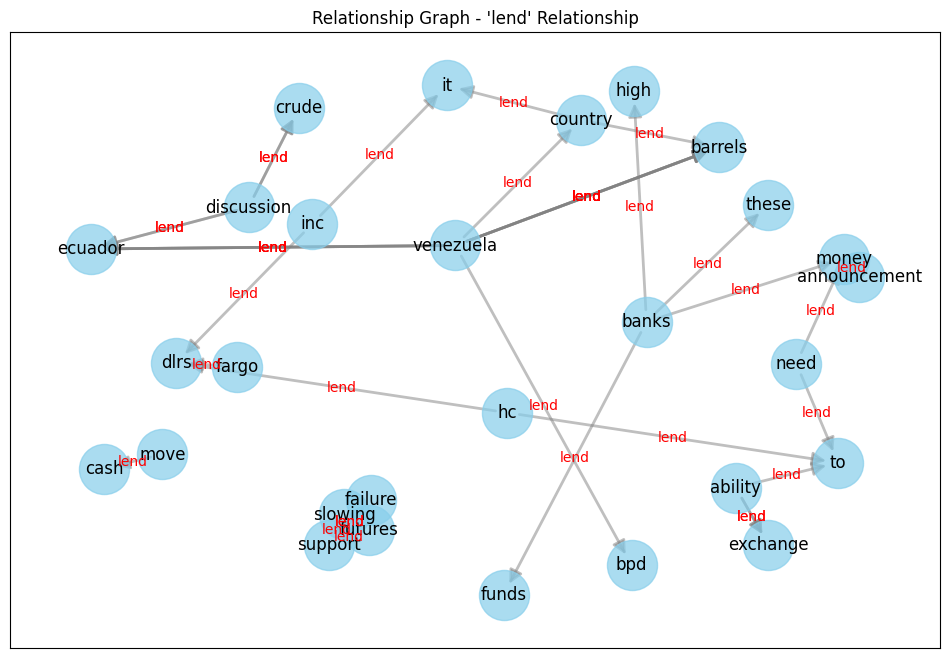

In [9]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 8))

# Define the layout for the graph
layout = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, layout, node_size=1300, node_color='skyblue', alpha=0.7)

# Draw the edges
nx.draw_networkx_edges(G, layout, width=2, edge_color='gray', alpha=0.5, arrowsize=20)

# Draw labels
nx.draw_networkx_labels(G, layout, font_size=12, font_color='black')

# Add a title
plt.title("Relationship Graph - 'lend' Relationship")

# Annotate the edges with labels
edge_labels = nx.get_edge_attributes(G, 'edge')
for edge, label in edge_labels.items():
    x, y = (layout[edge[0]][0] + layout[edge[1]][0]) / 2, (layout[edge[0]][1] + layout[edge[1]][1]) / 2
    plt.text(x, y, label, fontsize=10, color='red', ha='center', va='center')

# Show the plot
plt.show()

Above is the example of a portion of the knowledge graph for the edges related the lending relationships.  
  
> Knowledge graphs have the ability to reveal and query aggregated information over entities. They excel at representing direct relationships between entities and extracting meaningful insights from these connections.  
  
> Despite their strengths, knowledge graphs may not be the optimal choice in all situations.  
**Example Scenario**: When the goal is to cluster documents based on their semantic content, knowledge graphs might not provide the most suitable data structure for effective analysis. Because To do cluster document involve considering the broader context including relationship, interaction, pattern, common theme concept between various element within the text. So, cluster documents based on their meaning, knowledge graphs might not be the best choice because :
- Knowledge graphs focus only on capturing direct relationship between entities which make this graph unable to capture overall meaning and context or level of relationship within each sentence or across sentence within the text.  
  
> To address these limitations, we will encode the information present in the document in the form of a `bipartite graph`.